# Setup
--> "Runtime" --> "Change runtime type" --> "GPU" hardware accelerator

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random as random

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.datasets import mnist
from keras.utils import np_utils

In [2]:
seed = 10
np.random.seed(seed)

# Handwritten Digit Recognition Dataset

## Description

- The dataset was constructed from a number of scanned document datasets available from the _National Institute of Standards and Technology (NIST)_. This is where the name for the dataset
comes from, as the _Modified NIST_ or [_MNIST_ dataset](http://yann.lecun.com/exdb/mnist/).

- Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

- Each image is a 28 x 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60'000 images are used to train a model and a separate set of 10'000 images are used to test it.

- It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict.

- Results are reported using prediction error, which is nothing more than the inverted classification accuracy. 

- Excellent results achieve a prediction error of less than 1%. State-of-the-art prediction error of approximately 0.2% can be achieved with large Convolutional Neural Networks. State-of-the-art results and links to the relevant papers on the MNIST and
other datasets are listed [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"
alt="drawing" width="700"/>

## Load Data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


In [5]:
for r in range(X_train[0].shape[0]):
  for c in range(X_train[0].shape[1]):
    print(str(X_train[0][r][c]).zfill(3), end=' ')
  print()

000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 
000 000 000 000 000 000 000 000 000 000 000 000 003 018 018 018 126 136 175 026 166 255 247 127 000 000 000 000 
000 000 000 000 000 000 000 000 030 036 094 154 170 253 253 253 253 253 225 172 253 242 195 064 000 000 000 000 
000 000 000 000 000 000 000 049 238 253 253 253 253 253 253 253 253 251 093 082 082 056 039 000 000 000 000 000 
000 000 000 000 000 000 000 018 219 253 253 253 253 253 198 182 247 241 000 000 000 000 000 000 

In [6]:
print(y_train[0])

5


## Preview

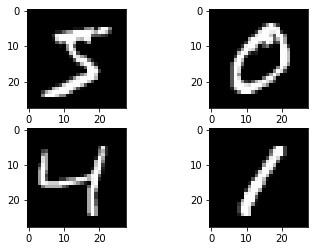

In [7]:
fig, ax = plt.subplots(2, 2)
ax[0][0].imshow(X_train[0], cmap=plt.get_cmap('gray'))
ax[0][1].imshow(X_train[1], cmap=plt.get_cmap('gray'))
ax[1][0].imshow(X_train[2], cmap=plt.get_cmap('gray'))
ax[1][1].imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

# MLP

- Images are just sequences of lines... 
- Could a simple MLP solve this task?

### Load

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


### Reshape & Rescale

In [9]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') / 255

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (60000, 784) (60000,)
Test:  (10000, 784) (10000,)


In [10]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### OneHot Encode the Label

In [11]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
print(y_train.shape, y_test.shape)
print(y_train[:4])

(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Build Model

- Create an MLP with one single hidden layer with 784 neurons.

In [13]:
def mlp_model():
  model = keras.Sequential([
   layers.Dense(num_pixels, 
                input_dim=num_pixels,
                kernel_initializer='normal',
                activation='relu'),
    layers.Dense(num_classes,
                 kernel_initializer='normal', 
                 activation='softmax')])
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [14]:
model = mlp_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


## Train Model

In [15]:
model = mlp_model()

early_stopping = callbacks.EarlyStopping(
    min_delta=0,
    patience=10,
    restore_best_weights=True,
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    verbose=1,
    callbacks=[early_stopping])

Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3385 - accuracy: 0.9039 - val_loss: 0.1692 - val_accuracy: 0.9528
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 0.1385 - accuracy: 0.9601 - val_loss: 0.1199 - val_accuracy: 0.9662
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.9747 - val_loss: 0.0973 - val_accuracy: 0.9715
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0652 - accuracy: 0.9815 - val_loss: 0.0928 - val_accuracy: 0.9721
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0471 - accuracy: 0.9877 - val_loss: 0.0907 - val_accuracy: 0.9715
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9905 - val_loss: 0.0753 - val_accuracy: 0.9774
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0267 - accuracy: 0.9934 - val_loss: 0.0751 - val_accuracy: 0.9776

## Evaluate Model Performance

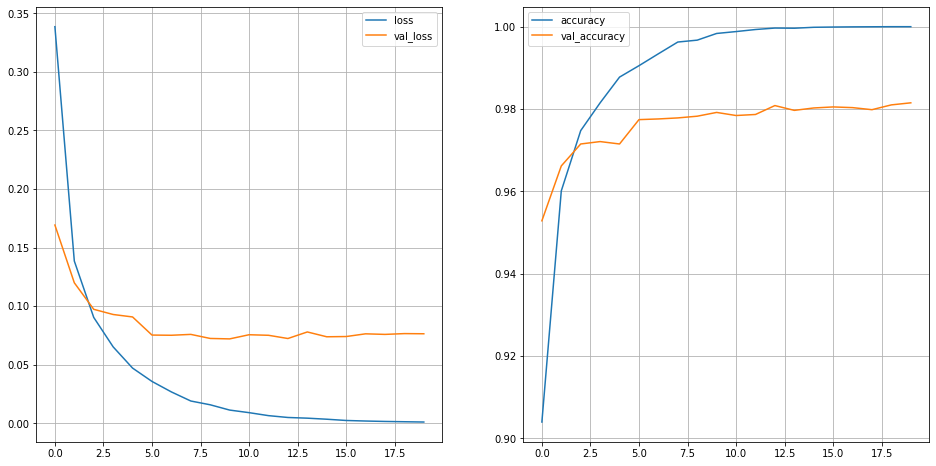

MLP Error: 1.88%


In [16]:
df_history = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

cut_first_n = 0
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['accuracy', 'val_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("MLP Error: %.2f%%" % (100-scores[1]*100))

## Make Predictions

0 with probability of 0.00%
1 with probability of 0.00%
2 with probability of 0.00%
3 with probability of 0.01%
4 with probability of 0.00%
5 with probability of 0.00%
6 with probability of 0.00%
7 with probability of 99.99%
8 with probability of 0.00%
9 with probability of 0.00%


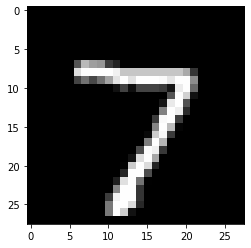

In [17]:
x = X_test[0]
plt.imshow(x.reshape(28, 28), cmap=plt.get_cmap('gray'))
for label, proba in enumerate(model.predict(x.reshape(1, -1))[0]):
  print(f"{label} with probability of {proba*100:.2f}%")

[3, 6, 3, 4, 5, 8, 0, 5, 6, 7]


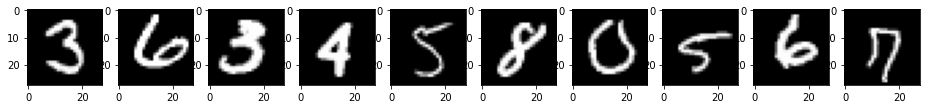

In [18]:
N = 10
fig, ax = plt.subplots(1, N, figsize=(16, 4))
predictions = []
for _ in range(N):
  i = random.randint(0, X_test.shape[0])
  ax[len(predictions)].imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
  predictions.append(np.argmax(model.predict(X_test[i].reshape(1, -1))))
print(predictions)
plt.show()

# Simple CNN

## Load

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


## Reshape & Rescale

- In Keras, when we use the TensorFlow backend, the layers used for two-dimensional convolutions expect pixel values with the dimensions [width][height][channels].

In [20]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (60000, 28, 28, 1) (60000,)
Test:  (10000, 28, 28, 1) (10000,)


## OneHot Encode the Label

In [21]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Build Model

1. Convolutional layer with 32 feature maps, from 5 x 5 filters and ReLu activation function. This is the input layer, expecting images with the structure outline above, 28 x 28 x 1.

2. Pooling layer taking the max over 2 x 2 patches.

3. Dropout layer with a probability of 20%.

4. Flatten layer.

5. Fully connected layer with 128 neurons and rectifier activation function.

6. Output layer with 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

In [24]:
def simple_cnn():
  model = keras.Sequential([
    layers.Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')])
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [25]:
model = simple_cnn()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

## Train Model

In [26]:
model = simple_cnn()

early_stopping = callbacks.EarlyStopping(
    min_delta=0,
    patience=10,
    restore_best_weights=True,
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    verbose=1,
    callbacks=[early_stopping])

Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 0.3197 - accuracy: 0.9096 - val_loss: 0.1069 - val_accuracy: 0.9703
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0886 - accuracy: 0.9746 - val_loss: 0.0681 - val_accuracy: 0.9817
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0620 - accuracy: 0.9820 - val_loss: 0.0547 - val_accuracy: 0.9842
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0479 - accuracy: 0.9853 - val_loss: 0.0572 - val_accuracy: 0.9822
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.0513 - val_accuracy: 0.9849
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0491 - val_accuracy: 0.9855
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0473 - val_accuracy: 0.9858

## Evaluate Model Performance

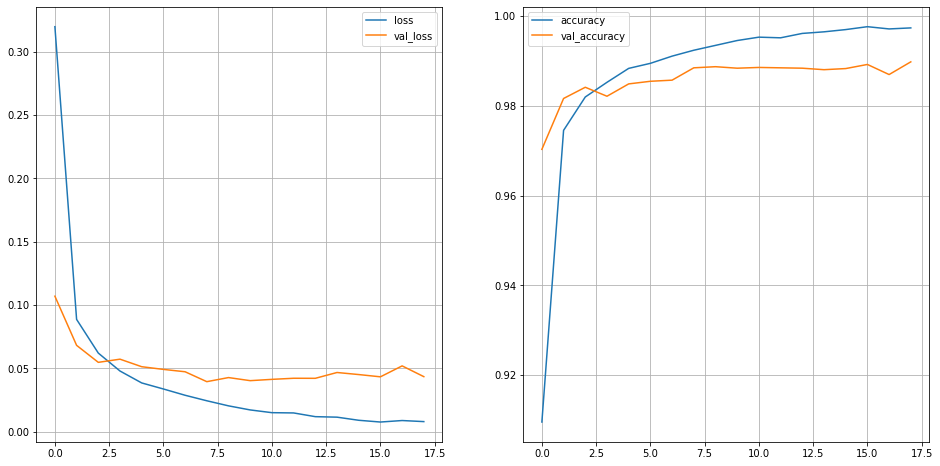

Simple CNN Error: 1.04%


In [27]:
df_history = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

cut_first_n = 0
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['accuracy', 'val_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

scores = model.evaluate(X_test, y_test, verbose=0)
print("Simple CNN Error: %.2f%%" % (100-scores[1]*100))

# ❓ Exercise

Now you'll create, train and evaluate a model capable of close to state-of-the-art results. Here's a good topology to start with, take it from there:

  1. Convolutional layer with 32 feature maps of size 5 x 5.
  2. Pooling layer taking the max over 2 x 2 patches.
  3. Convolutional layer with 16 feature maps of size 3 x 3.
  4. Pooling layer taking the max over 2 x 2 patches.
  5. Dropout layer with a probability of 20%.
  6. Flatten layer.
  7. Fully connected layer with 128 neurons and rectifier activation.
  8. Fully connected layer with 64 neurons and rectifier activation.
  9. Output layer.